In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Profiling moderator (L1)

Using synthetic data generated with `mantid.predictPeaks` assuming an ideal Corelli Instrument.
The profile of the moderator is the easiest one to get since it is
- single var
- using all peaks (~1000)

Minimum@
        dL1  residual
397 -0.0003  0.000087


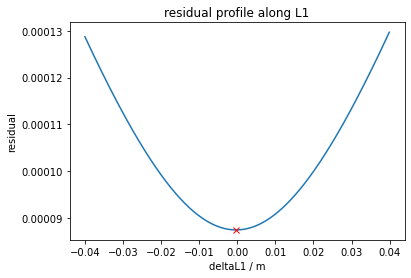

In [3]:
pd_L1 = pd.read_csv("data/profileSCDCalibratePanels2_L1.csv", delimiter="\t")

# locate the minimum
dL1_at_minResidual = pd_L1[pd_L1["residual"]==pd_L1["residual"].min()]

# plot
plt.plot(pd_L1["dL1"],pd_L1["residual"])
plt.plot(dL1_at_minResidual["dL1"], dL1_at_minResidual["residual"], "rx")
plt.xlabel("deltaL1 / m")
plt.ylabel("residual")
plt.title("residual profile along L1")
print(f"Minimum@\n{dL1_at_minResidual}")

For an ideal synthetic data, we are expecting dL1=0 with residual=0.0 if all qvectors are properly stored with any purburbation.
The reality is that the current data structure (peak and peak workspace) in Mantid will introduce a 0.3mm error right from start even with an ideal dataset.
In other words, the numerical limit of the current SCDCalibratePanels is 0.5mm and any number reported below or close to this should not be trusted.

# Profiling for individual banks

The total number of freedom for the calibration of Corelli bank is 6, including
- translation along x, y, z
- rigid body rotation represented as Rodrigues vector
  - the rotation axis is represented as polar coordinates, (theta, phi) in radians.
  - the rotation angle is represented as a single float in degrees.

## Translation only

If we only allow the bank to translate, the paramter space can be charaterized by three surface plot
- dx-dy (dz=0)
- dy-dz (dx=0)
- dx-dz (dy=0)

This section provides the results for banks in CORELLI instrument.

In [4]:
def profile_bank(bank_num):
    #-- load the data
    df_bank = pd.read_csv(
        f"data/stepsize_100/profileSCDCalibratePanels2_bank{bank_num}.csv",
        delimiter="\t",
    )
    
    #-- get the global minimum and report on terminal
    global_minimum = df_bank[df_bank["residual"]==df_bank["residual"].min()]
    print(f"Global minimum is at:\n{global_minimum}")
    
    #-- prep for viewing along different axis
    for me in ("dx", "dy", "dz"):
        df_bank[f"|{me}|"] = np.absolute(df_bank[me])
    
    #-- generate the figures
    fig = plt.figure(figsize=plt.figaspect(0.33))
    
    # x-y, dz=0
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(
        df_bank.loc[df_bank["|dz|"]<1e-5, "dx"],
        df_bank.loc[df_bank["|dz|"]<1e-5, "dy"],
        df_bank.loc[df_bank["|dz|"]<1e-5, "residual"],
        alpha=0.05,
    )
    ax1.set_title("dx-dy plane (with dz=0)")
    ax1.set_xlabel("dx/meter")
    ax1.set_ylabel("dy/meter")
    ax1.set_zlabel("residual")
    ax1.view_init(elev=25, azim=-25)
    
    # y-z, dx=0
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(
        df_bank.loc[df_bank["|dx|"]<1e-5, "dy"],
        df_bank.loc[df_bank["|dx|"]<1e-5, "dz"],
        df_bank.loc[df_bank["|dx|"]<1e-5, "residual"],
        alpha=0.05,
    )
    ax2.set_title("dy-dz plane (with dx=0)")
    ax2.set_xlabel("dy/meter")
    ax2.set_ylabel("dz/meter")
    ax2.set_zlabel("residual")
    ax2.view_init(elev=25, azim=-25)
    
    # x-z, dy=0
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(
        df_bank.loc[df_bank["|dy|"]<1e-5, "dx"],
        df_bank.loc[df_bank["|dy|"]<1e-5, "dz"],
        df_bank.loc[df_bank["|dy|"]<1e-5, "residual"],
        alpha=0.05,
    )
    ax3.set_title("dx-dz plane (with dy=0)")
    ax3.set_xlabel("dx/meter")
    ax3.set_ylabel("dz/meter")
    ax3.set_zlabel("residual")
    ax3.view_init(elev=25, azim=-25)

### bank1

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
485149 -0.0004  0.0002 -0.0002      0    0       0  0.000613


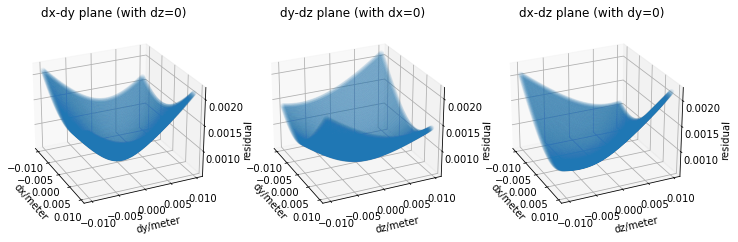

In [5]:
profile_bank(1)

### bank2

### bank3

### bank4

### bank5

### bank6

### bank7

### bank8

### bank9

### bank10

Global minimum is at:
           dx      dy      dz  theta  phi  rogang  residual
455446 -0.001  0.0008 -0.0008      0    0       0  0.000591


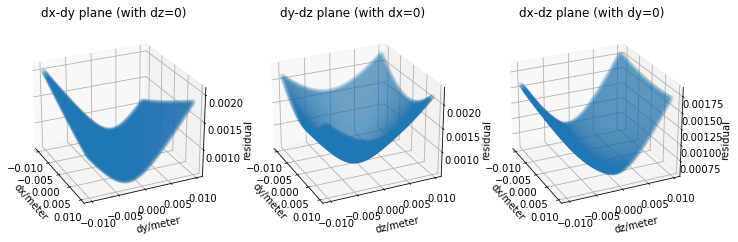

In [6]:
profile_bank(10)

### bank11

Global minimum is at:
            dx            dy      dz  theta  phi  rogang  residual
535046  0.0006 -4.878910e-19 -0.0008      0    0       0  0.000539


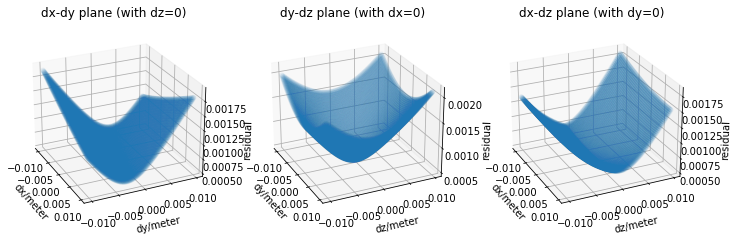

In [7]:
profile_bank(11)

### bank12

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
475246 -0.0006  0.0004 -0.0008      0    0       0  0.000637


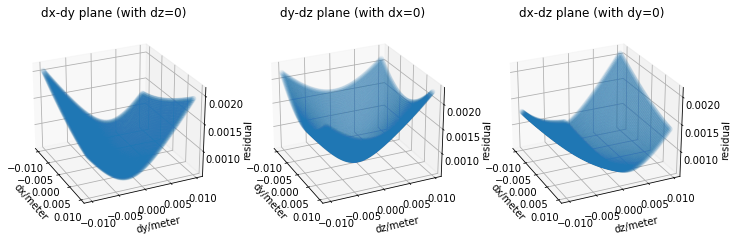

In [8]:
profile_bank(12)

### bank13

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
465447 -0.0008  0.0008 -0.0006      0    0       0  0.000601


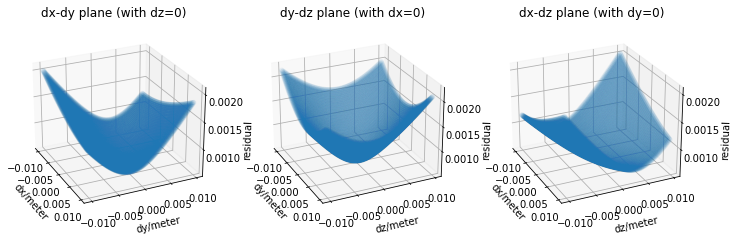

In [9]:
profile_bank(13)

### bank14

### bank15

### bank16

### bank17

### bank18

### bank19

### bank20

Global minimum is at:
            dx     dy      dz  theta  phi  rogang  residual
475547 -0.0006  0.001 -0.0006      0    0       0  0.000896


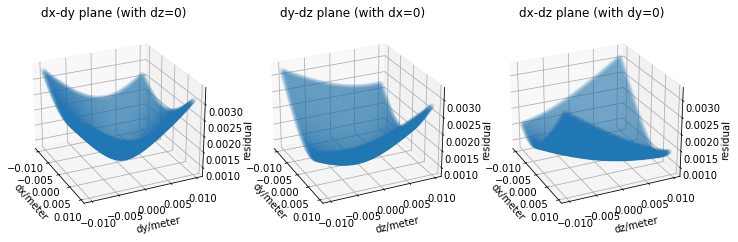

In [10]:
profile_bank(20)

### bank21

Global minimum is at:
            dx     dy      dz  theta  phi  rogang  residual
465551 -0.0008  0.001  0.0002      0    0       0  0.000874


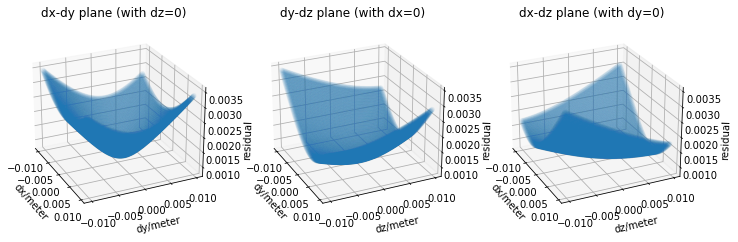

In [11]:
profile_bank(21)

### bank22

Global minimum is at:
            dx     dy      dz  theta  phi  rogang  residual
416041 -0.0018  0.002 -0.0018      0    0       0  0.001339


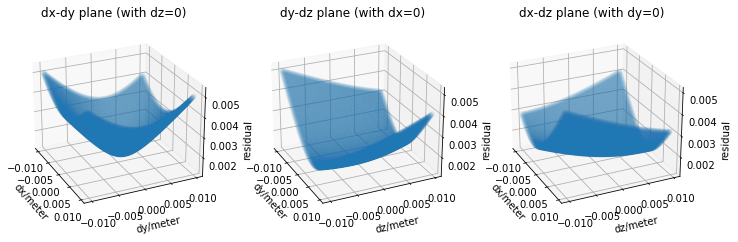

In [12]:
profile_bank(22)

### bank23

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
446431 -0.0012  0.0028 -0.0038      0    0       0  0.001745


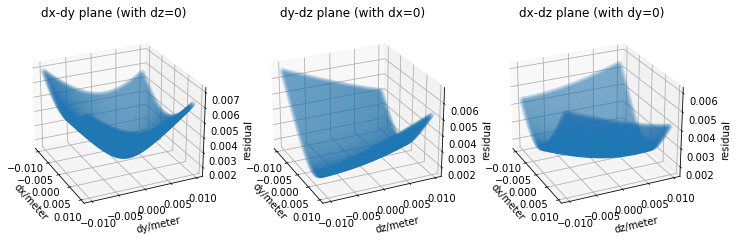

In [13]:
profile_bank(23)

### bank24

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
465374 -0.0008  0.0006  0.0048      0    0       0  0.001582


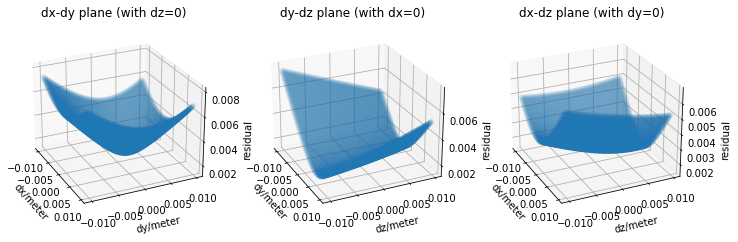

In [14]:
profile_bank(24)

### bank25

### bank26

### bank27

### bank28

### bank29

### bank30

### bank31

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
495252 -0.0002  0.0004  0.0004      0    0       0  0.000548


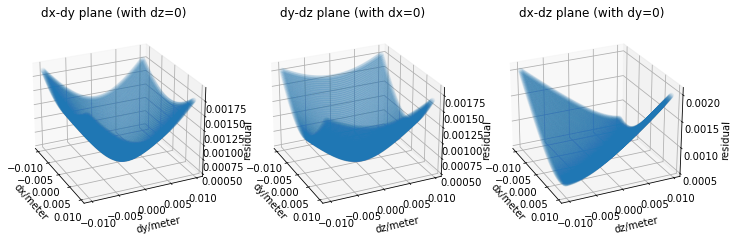

In [15]:
profile_bank(31)

### bank32

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
475253 -0.0006  0.0004  0.0006      0    0       0  0.000594


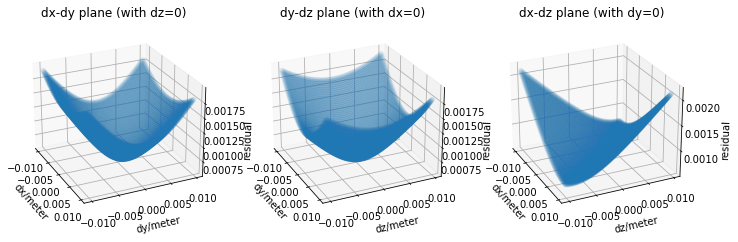

In [16]:
profile_bank(32)

### bank33

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
435252 -0.0014  0.0004  0.0004      0    0       0  0.000597


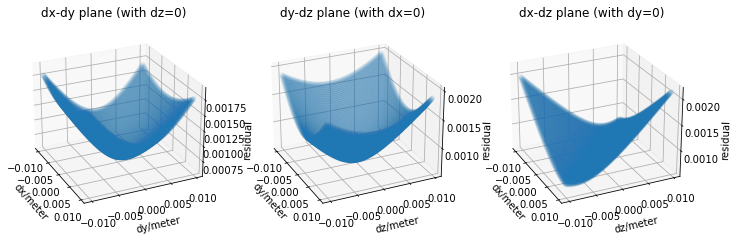

In [17]:
profile_bank(33)

### bank34

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
435244 -0.0014  0.0004 -0.0012      0    0       0  0.000558


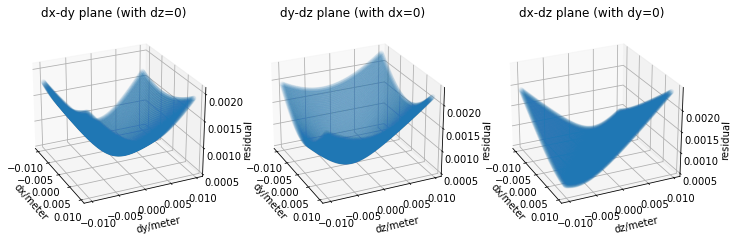

In [18]:
profile_bank(34)

### bank35

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
485244 -0.0004  0.0004 -0.0012      0    0       0  0.000543


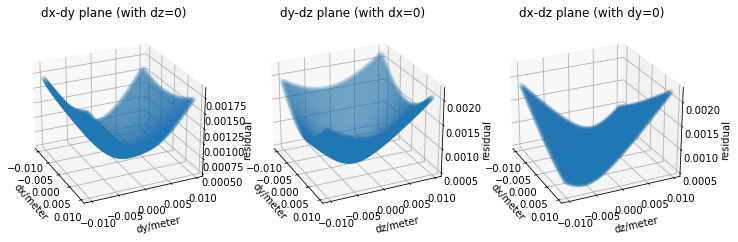

In [19]:
profile_bank(35)

### bank36

### bank37

### bank38

### bank39

### bank40

### bank41

Global minimum is at:
            dx      dy      dz  theta  phi  rogang  residual
445254 -0.0012  0.0004  0.0008      0    0       0  0.000627


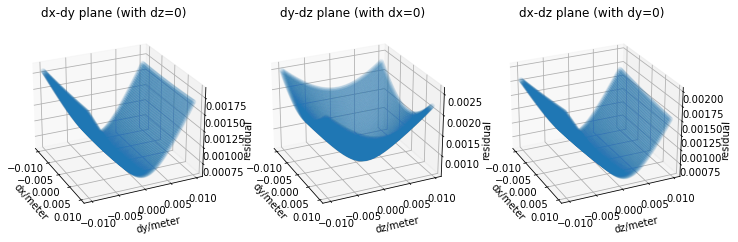

In [20]:
profile_bank(41)